# Create the Elephant Curve

Create your own "elephant chart" of the percentage change of income, measured over percentiles of the world population ranked by income.

The data is available as the [Lakner-Milanovic 2013 World Panel Income Distribution (LM-WPID)](http://www.worldbank.org/en/research/brief/World-Panel-Income-Distribution). This database measures the annual income of an individual across several dimensions including country and income decile group. First we'll load pyplot from matplotlib to plot the data, and then pandas to wrangle the data...

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

We'll be using the Pandas python library, and you can find the documentation for Pandas at this link.

https://pandas.pydata.org/docs/

The documentation includes the following useful tutorials.

* [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html)

* [Essential basic functionality](https://pandas.pydata.org/docs/user_guide/basics.html)

In [2]:
import pandas as pd
pd.__version__

'1.0.3'

Now we can load the world panel income distribution database from a local copy of this [csv file](http://pubdocs.worldbank.org/en/972401475765303436/LM-WPID-web.csv).

In [3]:
lmwpid = pd.read_csv('LMWPIDweb.csv')

In [4]:
lmwpid

,contcod,country,region,year,inc_con,source,mysample,bin_year,group,pop,RRinc,RRmean,cons_2005ppp_pc,gdp_2005ppp_pc,totpop
0,AGO,Angola,Sub-Saharan Africa,1995,C,wyd,1,1993,1,1.137175,174.0,806,NaN,2090.259277,11.371750
1,AGO,Angola,Sub-Saharan Africa,1995,C,wyd,1,1993,2,1.137175,287.0,806,NaN,2090.259277,11.371750
2,AGO,Angola,Sub-Saharan Africa,1995,C,wyd,1,1993,3,1.137175,373.0,806,NaN,2090.259277,11.371750
3,AGO,Angola,Sub-Saharan Africa,1995,C,wyd,1,1993,4,1.137175,450.0,806,NaN,2090.259277,11.371750
4,AGO,Angola,Sub-Saharan Africa,1995,C,wyd,1,1993,5,1.137175,538.0,806,NaN,2090.259277,11.371750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,ZWE,Zimbabwe,Sub-Saharan Africa,1996,C,wyd,1,1998,6,1.226174,381.0,552,549.659005,677.041626,12.261742
5796,ZWE,Zimbabwe,Sub-Saharan Africa,1996,C,wyd,1,1998,7,1.226174,463.0,552,549.659005,677.041626,12.261742
5797,ZWE,Zimbabwe,Sub-Saharan Africa,1996,C,wyd,1,1998,8,1.226174,597.0,552,549.659005,677.041626,12.261742
5798,ZWE,Zimbabwe,Sub-Saharan Africa,1996,C,wyd,1,1998,9,1.226174,837.0,552,549.659005,677.041626,12.261742


The fields are described in detail by this [metafile description](http://pubdocs.worldbank.org/pubdocs/publicdoc/2015/10/895211444154092188/Description-Lakner-Milanovic-database-2.pdf). Here are the important fields for this assignment.

* **RRinc** is a measure of the average annual income of an individual in this country in this income decile group. The units are 2005 PPP which corresponds approximately to US dollars in the year 2005.

* **bin_year** is the year dimension (1988, 1993, 1998, 2003, 2008) of the measurements.

* **group** provides the income decile group of the measurement, from 1 to 10, where 1 means RRinc measures the average annual income of someone in the bottom 10% of earners in this country that year, and 10 means the measure was for the average income of the top 10% of that country that year.

* **pop** is a measure of the population of the people in a country's income decile group for that year, in units of one million (so e.g. a value of 0.1 corresponds to 100,000 people). Since this is the population of a decile group, it will be 10% of the population of the country (which is reported in the totpop field).

* **country** is the name of the country the measurement was taken in. (Don't aggregate across this dimension if filtering mysample = 1)

* **mysample** separates high-population countries into regions. Filter on this, selecting either 0 or 1 (but not both). If mysample is 0 then the measure is reported for each country as a whole and you can aggregate across the "country" field. If mysample is 1 then the highly populated countries of China, India and Indonesia are separated into rural and urban subsets. Both of these subsets will have the same name in the country field, but their country codes will be different. For example, if mysample is 1, then China's rural data is reported under country code CHN-R and its urban data is reported under country code CHN-U, but both share the same country name "China."

* **contcod** is a three-letter country code, plus differentiation between rural and urban if mysample = 1. Safest to aggregate over contcod instead of country.

In [5]:
lmwpid[(lmwpid['country'] == 'China') & (lmwpid['bin_year'] == 1988)]

,contcod,country,region,year,inc_con,source,mysample,bin_year,group,pop,RRinc,RRmean,cons_2005ppp_pc,gdp_2005ppp_pc,totpop
870,CHN,China,China,1987,I,povcal,0,1988,1,110.162995,161.0,493,452.401917,958.370056,1101.629952
871,CHN,China,China,1987,I,povcal,0,1988,2,110.162995,233.0,493,452.401917,958.370056,1101.629952
872,CHN,China,China,1987,I,povcal,0,1988,3,110.162995,294.0,493,452.401917,958.370056,1101.629952
873,CHN,China,China,1987,I,povcal,0,1988,4,110.162995,350.0,493,452.401917,958.370056,1101.629952
874,CHN,China,China,1987,I,povcal,0,1988,5,110.162995,405.0,493,452.401917,958.370056,1101.629952
875,CHN,China,China,1987,I,povcal,0,1988,6,110.162995,464.0,493,452.401917,958.370056,1101.629952
876,CHN,China,China,1987,I,povcal,0,1988,7,110.162995,532.0,493,452.401917,958.370056,1101.629952
877,CHN,China,China,1987,I,povcal,0,1988,8,110.162995,620.0,493,452.401917,958.370056,1101.629952
878,CHN,China,China,1987,I,povcal,0,1988,9,110.162995,756.0,493,452.401917,958.370056,1101.629952
879,CHN,China,China,1987,I,povcal,0,1988,10,110.162995,1113.0,493,452.401917,958.370056,1101.629952


## Step 1 (50 Points)

First, create a dataframe called lm1988 that is a table of only the 1988 data with mysample = 1. The only columns we will need are RRinc and pop, and these will respresent the measurement for each income decile group and country code in the 1988 mysample=1 data.

See this link below for instructions on how to query specific rows in a dataframe, including how to query on multiple conditions.

https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#how-do-i-filter-specific-rows-from-a-dataframe

In [6]:
'''Enter your solution below the "your code here" comment,'''
# your code here

lm1988 = lmwpid[(lmwpid['bin_year'] == 1988) & (lmwpid['mysample'] == 1)][['pop','RRinc']]


Your lm1988 table of 750 RRinc values in non-decreasing order should look like this image below.

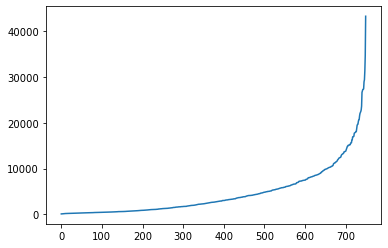

The code below uses matplotlib to create a line* chart showing the increasing income of the deciles across all of the counties. The vertical axis is the RRinc and the horizontal axis is the row number of the RRinc data in the database. Since matplotlib will connect datapoints with line segments in database  row order we have to first sort the database by RRinc, and then reset the database row indices to the new order.

(\*) *This graph is a bit misleading as a line plot because the horizontal axis should not be evenly spaced, as the deciles represent different population counts from country to country. For such cases a bar graph should be used to more properly communicate the horizontal axis represents categories and not uniformly spaced quantitative values, but because there are so many data points the individual bars would not be resolved very well, so a line graph can be used in such cases.*

Even though the horizontal axis is not a linear representation of population, this line graph does show us that higher incomes are concentrated across a small number of population deciles in a small number of countries.

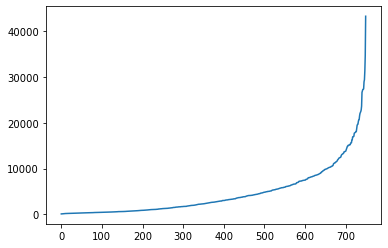

In [7]:
lm1988.sort_values('RRinc').reset_index()['RRinc'].plot()

In [8]:
'''Your result should have 750 rows, otherwise you will get the error in the string
following the assert(), because that string is only evaluated if the assert() fails'''

assert(lm1988.shape[0] == 750),(
    "Your lm1988 dataframe has {} rows instead of the expected 750 rows.".format(lm1988.shape[0])
)

In [9]:
'''Your result should have a 'pop' field'''
assert('pop' in lm1988.columns),(
    "Your lm1988 dataframe is missing the field: pop."
)

In [10]:
'''Your result should have an 'RRinc' field'''
assert('RRinc' in lm1988.columns),(
    "Your lm1988 dataframe is missing the field: RRinc."
)

In [11]:
'''Your lm1988 has China's mysample=1 data'''
assert(lm1988[(lm1988['RRinc'] == 157)].shape[0] == 1),(
    "lm1988 is missing data with bin_year=1988 and mysample=1 from lmwpid."
)

In [12]:
'''You lm1988 should not have an entry for this China mysample = 0 data'''
assert(lm1988[(lm1988['RRinc'] == 161)].shape[0] == 0),(
    "lm1988 includes data other than mysample=1 from lmwpid."
)

In [13]:
'''and should also not have an entry for this China 1998 data'''
assert(lm1988[(lm1988['RRinc'] == 1665)].shape[0] == 0),(
    "lm1988 includes data other than bin_year=1988 from lmwpid."
)

In [14]:
'''A 'hidden test' in this cell will check your entire lm1988 dataframe'''

"A 'hidden test' in this cell will check your entire lm1988 dataframe"

## Step 2 (25 Points)

Sort the lm1988 dataframe in order of increasing RRinc, and create a new calculated field called runningpop that is the cumulative total of the pop field for the current row of the table and all rows before it.

Two Pandas methods that are helpful with this are [sort_values()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) and [cumsum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html). If you already sorted the data by RRinc when visualizing the result in the previous step, then you can skip that part in this step.

In [15]:
'''Enter your solution below the "your code here" comment'''
# your code here

lm1988 = lm1988.sort_values(by='RRinc').reset_index(drop=True)
lm1988['runningpop'] = lm1988['pop'].cumsum()

print(lm1988)

           pop    RRinc   runningpop
0     0.852521     82.0     0.852521
1     1.648237     85.0     2.500758
2     0.518956     87.0     3.019714
3     0.157990     99.0     3.177704
4     0.189233    104.0     3.366937
..         ...      ...          ...
745   1.653220  28953.0  4109.394817
746   0.335000  29393.0  4109.729817
747   7.814462  31358.0  4117.544278
748   2.689500  34682.0  4120.233778
749  24.449901  43279.0  4144.683679

[750 rows x 3 columns]


In [16]:
'''RRinc should be monotonic (sorted in non-decreasing order)'''
assert(lm1988['RRinc'].is_monotonic),(
    "Your lm1988 dataframe is not properly sorted by its RRinc field values."
)

In [17]:
'''Your result should have the 'runningpop' fields'''
assert('runningpop' in lm1988.columns),(
    "Your lm1988 dataframe does not have a runningpop field."
)

In [18]:
'''runningpop should be monotonic (sorted in non-decreasing order)'''
assert(lm1988['runningpop'].is_monotonic),(
    "The cumulative sum of population stored in the runningpop field of lm1988 should never decrease, but appears to."
)

In [19]:
'''Each row's runningpop should be the sum of its pop and the running pop of the previous row'''
for ref_i in range(0,749):
    assert(lm1988.iloc[ref_i]['runningpop'] + lm1988.iloc[ref_i+1]['pop'] == lm1988.iloc[ref_i+1]['runningpop']),(
        "The runningpop at row {} is {} which is not the sum of its pop {} and the runningpop {} of the previous row.".format(
            ref_i+1, lm1988.iloc[ref_i+1]['runningpop'], lm1988.iloc[ref_i+1]['pop'], lm1988.iloc[ref_i]['runningpop']
        )
    )

Your lm1988 table of 750 runningpop values (in order of non-decreasing RRinc values) should look like this image below.

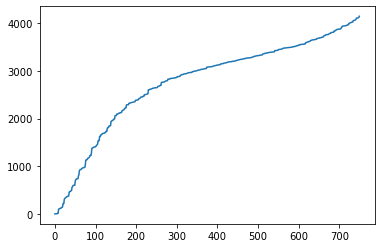

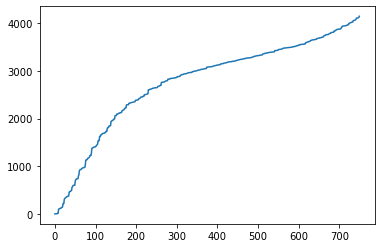

In [20]:
lm1988.sort_values('runningpop').reset_index()['runningpop'].plot()

In [21]:
'''The first thee values should match these (rounded to six decimal places)'''
assert((lm1988.iloc[0].round(6) == pd.Series({'pop': 0.852521, 'RRinc': 82,'runningpop': 0.852521})).all())
assert((lm1988.iloc[1].round(6) == pd.Series({'pop': 1.648236, 'RRinc': 85,'runningpop': 2.500758})).all())
assert((lm1988.iloc[2].round(6) == pd.Series({'pop': 0.518956, 'RRinc': 87,'runningpop': 3.019714})).all())

'''A 'hidden test' will check your pop, RRinc and runningpop values in all the rows of lm1988'''

"A 'hidden test' will check your pop, RRinc and runningpop values in all the rows of lm1988"

## Step 3 (5 Points)

Use the Pandas cut() method to create a new field called "ventile" that contains an integer value from zero to 19 indicating which of 20 buckets each row belongs to, where each bucket represents approximately* the same population, with bucket zero holding the bottom 5% of the world population according to RRinc, and bucket 19 holding the top 5% of the world population according to RRinc.

(\*) *If we were being precise, we would divide the population in the RRinc record that crosses each ventile boundary. For the purposes of this exercise, we're going to skip that detail. This means that each "ventile" might represent a slightly different portion of the world population than exactly 5%.*

In [22]:
'''Enter your solution below the "your code here" comment'''
# your code here

total_pop = lm1988['runningpop'].max()
lm1988['percentile'] = lm1988['runningpop'] / total_pop * 100
lm1988['ventile'] = pd.cut(lm1988['percentile'], bins=20, labels=False)

#bins = [i * total_pop / 20 for i in range(21)]
#bins[-1] += 1
#lm1988['ventile'] = pd.cut(lm1988['runningpop'], bins=bins, labels=False, include_lowest=True, right=False)

In [23]:
'''The following RRinc records should fall into the following ventiles'''
assert(lm1988[lm1988['RRinc'] == 82]['ventile'].values[0] == 0)
assert(lm1988[lm1988['RRinc'] == 660]['ventile'].values[0] == 10)
assert(lm1988[lm1988['RRinc'] == 43279]['ventile'].values[0] == 19)

"""A 'hidden test' in this cell will check the ventile assignments of each row of lm1988"""

"A 'hidden test' in this cell will check the ventile assignments of each row of lm1988"

## Step 4 (10 Points)

Use the Pandas groupby() method to create v1988 which is a 20 row dataframe grouped by 'ventile'. (v1988 should also be sorted in ventile order.) Each row of v1988 represents a single ventile, and has its 'RRinc' field value set to the mean of the 'RRinc' field values in lm1988 that share that 'ventile' value. Your v1988 dataframe should be ordered by ventile (0th first, 19th last).

In [24]:
'''Enter your solution below the "your code here" comment'''
# your code here

v1988 = lm1988.groupby('ventile', as_index=False)['RRinc'].mean()
v1988 = v1988.sort_values(by='ventile').reset_index(drop=True)

print(v1988)

    ventile         RRinc
0         0    146.650000
1         1    220.866667
2         2    267.800000
3         3    302.900000
4         4    337.600000
5         5    380.933333
6         6    422.857143
7         7    458.500000
8         8    511.333333
9         9    589.142857
10       10    663.833333
11       11    854.295455
12       12   1149.375000
13       13   1547.673469
14       14   2335.752941
15       15   3766.407767
16       16   5907.835052
17       17   8707.367647
18       18  12421.369565
19       19  21245.357143


In [25]:
'''v1988 should be in ventile order'''
assert(v1988.index.is_monotonic_increasing),(
    "Your v1988 dataframe is not properly sorted by ventile."
)

In [26]:
'''The first three ventiles should have the following mean RRinc values'''
assert(v1988.at[0,'RRinc'].round(2) == 146.65)
assert(v1988.at[1,'RRinc'].round(2) == 220.87)
assert(v1988.at[2,'RRinc'].round(2) == 267.8)

'''A hidden test will check the mean RRinc value for all 20 rows of your ventile dataframe'''

'A hidden test will check the mean RRinc value for all 20 rows of your ventile dataframe'

## Step 5 (5 Points)

Do the same thing to create lm2008 and v2008 for the 2008 data with mysample = 1.

In [27]:
'''Enter your solution below the "your code here" comment'''
# your code here

lm2008 = lmwpid[(lmwpid['bin_year'] == 2008) & (lmwpid['mysample'] == 1)][['pop','RRinc']]
lm2008 = lm2008.sort_values(by='RRinc').reset_index(drop=True)
lm2008['runningpop'] = lm2008['pop'].cumsum()

total_pop = lm2008['runningpop'].max()
lm2008['percentile'] = lm2008['runningpop'] / total_pop * 100
lm2008['ventile'] = pd.cut(lm2008['percentile'], bins=20, labels=False)

v2008 = lm2008.groupby('ventile', as_index=False)['RRinc'].mean()
v2008 = v2008.sort_values(by='ventile').reset_index(drop=True)

print(v2008)

    ventile         RRinc
0         0    177.987013
1         1    307.162791
2         2    380.081081
3         3    442.025641
4         4    509.656250
5         5    570.074074
6         6    645.421053
7         7    751.181818
8         8    850.815789
9         9    996.362069
10       10   1191.775510
11       11   1478.943662
12       12   1832.298246
13       13   2373.769231
14       14   2998.555556
15       15   3944.894737
16       16   5826.833333
17       17   9319.954545
18       18  14688.666667
19       19  29282.260870


In [28]:
'''The first three 2008 ventiles should have the following mean RRinc values'''
assert(v2008.at[0,'RRinc'].round(2) == 177.99)
assert(v2008.at[1,'RRinc'].round(2) == 307.16)
assert(v2008.at[2,'RRinc'].round(2) == 380.08)

'''A hidden test will check all of your v2008 RRinc values (within two decimal places)'''

'A hidden test will check all of your v2008 RRinc values (within two decimal places)'

## Step 6 (5 Points)

Create a new series* called 'elephant' that consists of twenty rows, with each row showing for that ventile the change in RRinc in 2008 relative to RRinc in 1988.

(\*) *A series, specifically a pd.Series, is like a dataframe but only has one column of data and so doesn't require a column heading.*

In [29]:
'''Enter your solution below the "your code here" comment'''
# your code here
elephant = pd.Series((v2008['RRinc'] - v1988['RRinc']) / v1988['RRinc']) 

print(elephant)

0     0.213686
1     0.390716
2     0.419272
3     0.459312
4     0.509645
5     0.496519
6     0.526334
7     0.638346
8     0.663916
9     0.691206
10    0.795293
11    0.731185
12    0.594169
13    0.533766
14    0.283764
15    0.047389
16   -0.013711
17    0.070353
18    0.182532
19    0.378290
Name: RRinc, dtype: float64


In [30]:
'''The first three elephant values should be the following relative RRinc growth ratios'''
assert(elephant.at[0].round(3) == 0.214)
assert(elephant.at[1].round(3) == 0.391)
assert(elephant.at[2].round(3) == 0.419)

'''A hidden test will check all 20 rows of your elephant series (within three decimal places)'''

'A hidden test will check all 20 rows of your elephant series (within three decimal places)'

If all goes right, then elephant.plot() should generate this plot.
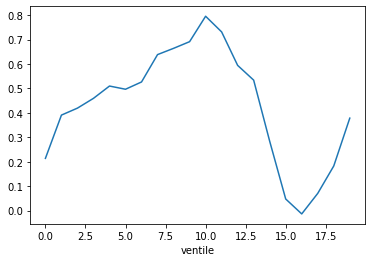

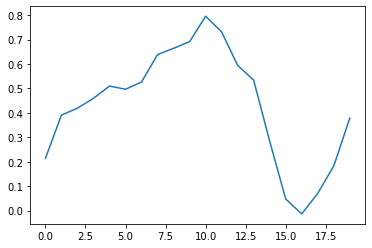

In [31]:
elephant.plot()